## Zadatak 1

Prilikom upotrebe KNN algoritma za regresiju dovoljno je napraviti minimalne promjene. Umjesto prebrojavanja klase koja se najčešće javlja, pronalazi se srednja vrijednost predviđenih rezultata, dok ostatak algoritma ostaje identičan kao u slučaju klasifikacije. 

Bitno je napomenuti da pored standardnih problema KNN algoritma koji se odnose na brzinu rada i memorijsko zauzeće kod velikih količina podataka, u slučaju regresije imamo dodatne probleme. KNN za regresiju mora da ima podatke koji su reprezentativni za naš problem. Recimo ako hoćemo da predviđamo cijene BitCoina moramo da imamo slučajeve kada su cijene bile niske i visoke. Naravno ovo je slučaj za sve algoritme, ali KNN je posebno osjetljiv na nedostatak trening uzoraka. Dati problem ćemo demonstrirati upotrebom KNN algoritma na problemu regresije sa prethodnih vježbi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Kao na prethodnim vjezbama kreiramo 
# X i Y sa greskom
X = np.linspace(0, 100, 10000)
Y = 2 * X + 1 
Y_error = np.random.normal(0, 2, 10000)  
Y_with_error = Y + Y_error

In [11]:
# Pronalazenje koeficijenata upotrebom
# standardne linearne regresije
coefficients = np.polyfit(X, Y_with_error, 1)
polynomial = np.poly1d(coefficients)
Y_pred = coefficients[0] * X + coefficients[1]

In [12]:
# Za upotrebu KNN algoritma za regresiju
# Dovoljno je samo importovati Regressor umjesto Classifier klase
from sklearn.neighbors import KNeighborsRegressor

knn_regression = KNeighborsRegressor()
# Reshape funkcija pretvara vektor iz jednog oblika u drugi 
# U nasem slucaju imamo vektor sljedeceg tipa [0, 1, ...]
# KNN ocekuje ulaze u obliku [[0], [1], [...]]
# zato sto time obezbjedjuje isti interfejs za rad 
# sa podacima koji imaju dosta veće ulazne vektore
knn_regression.fit(X.reshape(-1, 1), Y_with_error)

KNeighborsRegressor()

In [13]:
X_test = np.linspace(10, 20000, 3) # novi set tacaka za testiranje
Y_test = 2 * X_test + 1 + np.random.normal(0, 2, 3)

In [14]:
# predvidjanje linearnog regresora za testne tacke
Y_lin_pred_test = coefficients[0] * X_test + coefficients[1]

# predvidjanje KNN regresora za testne tacke
Y_knn_pred_test = knn_regression.predict(X_test.reshape(-1, 1))

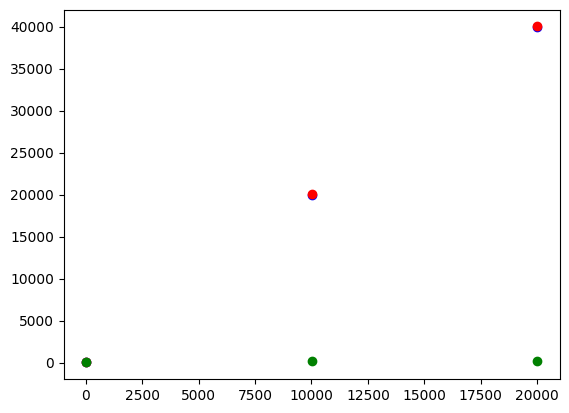

In [15]:
plt.plot(X_test, Y_test, 'bo')
plt.plot(X_test, Y_lin_pred_test, 'ro')
plt.plot(X_test, Y_knn_pred_test, 'go')
plt.show()

Iz prethodnog grafika možemo primijetiti da KNN (zelene tačke) daje veoma loše rezultate za naš slučaj regresije. Glavni razlog za to je što su sve ulazne tačke u opsegu od 0 do 10, a testne tačke izlaze iz tog opsega. Prilikom predviđanja na testnom skupu za sve tačke veće od 10, uvijek će najbliži susjedi biti tačke koje su blizu ulazu 10 (recimo ako su tri susjeda to će uvijek biti tačke 8, 9 10), tako da će i izlaz uvijek biti isti.

### Zadatak za vježbu

Modifikovati da podaci u trening skupu obuhvataju 10000 tačaka između 0 i 100. Ponoviti test nad istim testnim skupom i provjeriti rezultate.

## Zadatak 2

Na prošlim vježbama objašnjeno je zašto tačnost nije dobra metrika. Zbog toga potrebno je uvesti neke nove metrike koje na bolji način opisuju performanse našeg algoritma.

Kada pričamo o klasifikaciji bitan koncept je matrica konfuzije. U matrici konfuzije predstavljena su 4 tipa rezultata koje može da ostvari binarni klasifikator:
- tačno pozitivni (True Positive - TP) = pozitivni slučajevi koji su predviđeni kao pozitivni
- tačno negativni (True Negative - TN) = negativni slučajevi koji su predviđeni kao negativni
- lažno pozitivni (False Positive - FP) = negativni slučajevi koji su predviđeni kao pozitivni
- lažno negativni (False Negative - FN) = pozitivni slučajevi koji su predviđeni kao negativni

Ako se osvrnemo na primjer sa prošlih vježbi pozitivan slučaj bi bio detekcija da neki pacijent ima datu rijetku bolest, dok bi negativan bio detekcija da je nema.

Na osnovu prethodne 4 vrijednosti možemo zaključiti da tačnost ima sljedeću formulu:
$$
    accuracy = \frac{TP + TN}{TP + FP + TN + FN}
$$

Pored tačnosti iz matrice konfuzije možemo izvesti 2 nove metrike koje nam dosta bolje opisuju rad sistema:
- preciznost (Precision)
- odziv (Recall)

### Preciznost

Preciznost mjeri odnos pravih pozitivnih vrijednosti i svih pozitivnih predviđanja klasifikatora. Ona nam ukazuje koja je vjerovatnoća da kad klasifikator predvidi neku vrijednost kao pozitivnu da je ona zapravo pozitivna, odnosno koliko su ta pozitivna predviđanja precizna ili pouzdana:
$$
    precision = \frac{TP}{TP + FP}
$$

### Odziv

Odziv mjeri odnos TP vrijednosti klasifikatora i svih stvarnih pozitivnih vrijednosti u sistemu. Odnosno odziv mjeri kolika je osjetljivost klasifikatora da uhvati sve pozitivne vrijednosti koje se dešavaju:

$$
    recall = \frac{TP}{TP + FN}
$$

### Izvedene metrike

Zbog težnje čovjeka da opiše sistem i njegove performanse jednim brojem, iz preciznosti i odziva se mogu izvesti dodatne metrike.

#### F1 

F1 predstavlja harmonijsku sredinu preciznost i odziva i samim tim ukoliko je ijedna vrijednost od te dve metrike niska, sama F1 metrika će postati dosta niža:

$$
    F1 = 2 * \frac{precision * recall}{precision + recall}
$$

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6153846153846154
Precision: 0.625
Recall: 0.7142857142857143
F1 Score: 0.6666666666666666


# Vektorizacija sadržaja

Rekli smo da bi smo mogli da koristimo algoritme mašinskog učenja svi ulazi moraju biti pretvoreni u vektore, odnosno neki vid brojne reprezentacije. Osnovni problem koji se javlja je što većina podatka oko nas nisu u datoj formi (slike, audio, video, tekst). Zbog toga potrebno je definisati jasne algoritme i pravila za konverziju tih podataka u njihovu vektorsku reprezentaciju. Ono što je bitno za napomenuti je da data pravila konverzije moraju biti konzistentna unutar cijelog problema ili skupa podataka. Ne možemo recimo trening skup pretvarati upotrebom jednog skupa pravila a testni skup upotrebom drugog.

## Kategorički podaci

Jedan od osnovnih tipova podataka koji se veoma često susreću su kategorički podaci. Karakterišu se time što je svakom unosu dodijeljena jedna vrijednost iz konačnog skupa mogućih vrijednost. To su podaci kao što su pol, zanimanje, mjesto prebivališta i slično. 

Prilikomo konverzije datih podataka razlikujemo dve osnovne tehnike:
- podaci kao redni broj
- one-hot encoding

### Podaci kao redni broj

Ova tehnika je veoma jednostavna i bazira se na dodjeljivanju rednog broja svakoj od mogućih klasa počevši od 0. U trenutku kada susretnemo datu klasu u našim podacima samo je zamijenimo odgovarajućim brojem. Glavna prednost ovog pristupa je što je veoma jednostavan i brz za implementaciju. Međutim osnovni problem koji uvodi i zbog čega se ne koristi često je što uvodi ordinalne zavinosti između naših klasa, koje obično nisu oslikane u realnom svijetu.

Recimo posmatrajmo skup klasa boja [crvena, plava, bijela]. Ako bismo koristi ovu tehniku date boje bi bile pretvorene u sljedeći vektor [0, 1, 2]. Recimo da sada koristimo date vektore u nekom KNN problemu klasifikacije. Prilikom racunanja distanci dobili bismo vecu distancu između bijele i crvene boje nego bijele i plave, što bi značilo da su dva vektora u prvom slučaju više udaljeni nego u drugom. Naravno problem postaje veći ako imamo još veći broj klasa sa kojima radimo.

### One-hot encoding

One-hot encoding tehnika rješava problem prethodnog pristupa i predstavlja najčešće korištenu tehniku za rad sa kategoričkim podacima. One-hot encoding i dalje počinje konverzijom kategorije u redni broj. Nakon toga kreira se vektor sa nulama čija je veličina jednaka broju mogućih kategorija. Na kraju u dateom vektoru postavlja se 1 na indeks koji odgovara kategoriji kojoj ulaz pripada. Iako unosi dodatnu kompleknost i memorijsko zauzeće, uklanjanje ordinalnih zavisnosti značajno poboljšava performanse većine algoritama.

In [8]:
import numpy as np
# Importujemo odgovarajucu klasu iz scipit
from sklearn.preprocessing import OneHotEncoder

data = np.array([
    ['Red'],
    ['Green'],
    ['Blue'],
    ['Red'],
    ['Blue']
])

encoder = OneHotEncoder()

# Fitujemo podatke za encoder
# kako bi encoder znao koje su moguce klase
# Obicno dovoljno da bude samo lista mogucih klasa
encoder.fit(data)

# Transformisemo nase podatke na osnovu pravila
# Jako bitno - trasnform mora poslije fit metode
one_hot_encoded_data = encoder.transform(data).toarray()

print(one_hot_encoded_data)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Pretraga teksta

Pretraga teksta predstavlja problem pronalaženja tekstualnih dokumenata iz određenog skupa na osnovu nekog tekstualnog upita ili drugog dokumenta. Dati skup tekstualnih dokumenata koji pretražujemo naziva se korpus tektsa. Najjednostavniji pristup bio bi da pretražimo koji dokumenti imaju baš one riječi koje smo unijeli. Međutim, dati pristup bi davao veoma loše rezultate zbog problema o kojima ćemo diskutovati u nastavku. Kako bismo mogli koristiti tekst u bilo kom algoritmu za mašinsko učenje prvi korak je i dalje isti - pretvoriti tekst u vektor.

Prije nastavka bitno je uvesti jedno ograničenje koje malo olakšava rad sa tekstom. Koristićemo bag of words tehniku, odnosno posmatraćemo tekst samo kao skup riječi (ukoliko dvije recenice imaju iste rijeci u razlicitom poretku za nas će to biti dvije iste rečenice). Iako na taj način gubimo puno informacija o samom tekstu, dati pristup i dalje ima veoma dobre performanse u kontekstu pretrage teksta.

### Vektorizacija teksta

Veliki problem kada radimo sa tekstom javlja se problem što se iste riječi mogu javljati u velikom broju različitih formata u zavinosti od vremena, lica, padeža... Kako bismo mogli da vektorišemo tekst moramo prvo rješiti dati problem odnosno moramo uraditi neki vid normalizacije naših podataka, jer ne želimo da iste riječi imaju različitu vektorsku formu. Normalizacija je veoma čest proces u mašinskom učenju koje podrazumijeva pretvaranje, standardizaciju ili skaliranje naših podataka kako bismo ih doveli u formu pogodniju za rad sa algoritmima mašinskog učenja.

Procesiranje teksta obično obuhvata sljedeća 3 koraka:
- tokenizacija
- uklanjanje stop words
- stemming i lematizacija

#### Tokenizacija

Prvi neophodan korak je da kreiramo tokene iz našeg teksta. Tokeni predstavljaju osnovnu jedinicu sa kojom radimo i to su obično riječi. Naravno mogu se razvijati algoritmi čiji će tokeni biti slogovi ili neke druge slovne strukture, ali su to najčešće riječi. Za rad sa procesiranjem teksta koristićemo novu biblioteku nltk, koja uključuje veliki broj klasa i funkcija koje olakšavaju procesiranje teksta, posebno na engleskom jeziku. Instalacija biblioteke je ista kao i u prethodnim slučajevima:
```bash
    pip install nltk
```

In [10]:
import nltk

# preuzimamo neophodne podatke za rad sa engleskim jezikom
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/bojanb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bojanb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bojanb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/bojanb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Importujemo funkciju za tokenizaciju teksta na osnovu rijeci
from nltk.tokenize import word_tokenize

test_text = "Is ChatGPT going to take our jobs?"

tokenized = word_tokenize(test_text)
print(tokenized)

['Is', 'ChatGPT', 'going', 'to', 'take', 'our', 'jobs', '?']


#### Uklanjanje stop words

U našem tekstu obično imamo veliki broj riječi koji ne nose neko pretjerano značenje i koje se obično često pojavljuju. Takve riječi nemaju veliki značaj jer nam ne govore puno o samom tekstu i njegovom sadržaju te je obično poželjno da se takve riječi izbace iz teksta kako bismo dobili bolje performanse.

In [39]:
from nltk.corpus import stopwords

# definisemo set stop rijeci na osnovu nltk funkcije
# u ovom slucaju radimo sa engleskim jezikom
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokenized_text, stop_words):
    # dobro obraditi paznju da list comperhension i sta se tacno desava
    # pokusati razbiti dati list comperhension u for petlju 
    # koja popunjava novu listu upotrebom ovih pravila
    return [token.lower() for token in tokenized_text if token.lower() not in stop_words]

tokenized_no_stop_words = remove_stop_words(tokenized, stop_words)

# Mozemo primijetiti da su izbacene nebitne rijeci
print(tokenized_no_stop_words)

['chatgpt', 'going', 'take', 'jobs', '?']


#### Stemming i lematizacija

Nakon što smo podijelili tekst na riječi i izbacili nepotrebne riječi potrebno je rješiti problem različitih formi iste riječi. Naš cilj je da sve forme jedne riječi svedemo na istu riječ. Kako bismo to postigli razlikujemo dvije osnovne tehnike
- stemming
- lematizacija

Stemming predstavlja uklanjanje sufiksa ili prefiksa riječi na osnovu predefinisanih pravila kako bi se dobio korijen date riječi. Lematizacija je malo naprednija tehnika koja uzima u obzir i morfološku analizu date riječi, te u zavisnosti da li se radi o glagolu, imenici ili nekom drugom tipu riječi radi odgovarajuće transformacije. Lematizacija dosta bolje rješava probleme recimo glagola koji na engleskom imaju u popunosti različitu strukturu u prošlom i sadašnjem vremenu. Srećom obe operacije se mogu implementirati relativno jednostavno upotrebom gotovih klasa iz nltk biblioteke.

In [40]:
from nltk.stem import PorterStemmer

# definisemo stemmer na osnovu nltk klase
# dati stemmer sadrzi pravila za engleski jezik
stemmer = PorterStemmer()

def word_stem(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

stemmed_tokens = word_stem(tokenized_no_stop_words, stemmer)
print(stemmed_tokens)

['chatgpt', 'go', 'take', 'job', '?']


In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# prilikom lematizacije moramo prvo da odredimo o kom tipu rijeci se radi
# u zavisnosti od tipa proslidjujemo odgovarajuci flag u funkciju za lematizaciju
# kako bi znala koji skup pravila treba da primijeni

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# kreiramo lemmatizer na osnovu nltk klase
lemmatizer = WordNetLemmatizer()
    
def word_lemmatize(tokens, lemmatizer):
    return [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in nltk.pos_tag(tokens)]

lemmatized_tokens = word_lemmatize(tokenized_no_stop_words, lemmatizer)
print(lemmatized_tokens)

['chatgpt', 'go', 'take', 'job', '?']


### Vektorizacija

Nakon što je tekst doveden u odgovarajuću formu potrebno je izvršiti njegovu konverziju u vektor. Dva pristupa koja ćemo obraditi su:
- vektor prebrojavanja
- TF-IDF vektor
Prije nego sto izvršimo pretvaranje u vektor bitno je da imamo definisan rječnik. Rječnik prdstavlja skup svih normalizovanih riječi koje se pojavljuju u svim tekstovima ili dokumentima koje imamo na raspolaganju ili skup svih riječi koje postoje u datom jeziku.

#### Vektor prebrojavanja
Vektor prebrojavanja predstavlja najjednostavniji pristup gdje samo za svaku riječ koja postoji u našem rječniku prebrojimo koliko se puta pojavljuje u našem tekstu/dokumentu. Glavni nedostaci jednostavnog prebrojavanja su sljedeći:
- ne uzima u obzir značaj neke riječi - određene riječi koje se rijetko pojavljuju nose više informacija (više razlikuju trenutni tekst od ostalih)
- veći dokumenti će automatski imati veće brojevne vrijednosti - recimo sumarizacija nekog teksta i originalni tekst će potencijalno imati veliku distancu iako sadrže iste riječi samo zato što originalni tekst ima puno više pojavljivanja date riječi

#### TF-IDF vektor

TF-IDF pristup pokušava da riješi probleme se vektorom prebrojavanja. On uvodi dvije komponente na osnovu kojih se računa vrijednost za neku riječ. Ono što ostaje isto, je da i dalje za svaku riječ iz rječnika moramo izračunati TF-IDF vrijednost na osnovu riječi u trenutnom dokumentu. TF-IDF deskriptor se sastoji iz dva dijela:
1. TF (Term Frequency) - pokazuje frekvenciju datog tokena t u trenutom dokmentu d
$$
    TF(t, d) = \frac{\text{broj pojavljivanja tokena t u dokumentu d}}{\text{ukupan broj tokena u dokumentu d}}
$$
2. IDF (Inverse Document Frequency) - mjera koja pokazuke koliko je dati token značajan u našem korpusu (skupu dokumenata). Ideja je da tokeni koji se pojavljuju u malom broju dokumenata imaju veću vrijednost jer oni razlikuju dati dokument od ostalih.
$$
    IDF(t, D) = log{\frac{\text{ukupan broj dokumenata u korpusu D}}{\text{broj dokumenata koji sadrze token t}}}
$$

Konačni TF-IDF deskriptor se dobija kao proizvod TF i IDF dijelova: $TF-IDF(t, d, D) = TF(t, d) * IDF(t,D)$. Iako TF-IDF zahtijeva dosta više vremena za njegovo izračunavanje dobra stvar je da se prilikom pretrage teksta obično samo jednom računaju TF-IDF deskriptori za cijeli korpus, te da se oni onda čuvaju u memoriji. Prilikom novog upita potrebno je izračunati TF-IDF deksriptor samo za dati upit što ne zahtijeva puno vremena.

In [43]:
from sklearn.datasets import fetch_20newsgroups

# Ucitavamo skup dokumenata 
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(len(documents))
print(documents[0])

18846


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [50]:
# definisemo funkciju za procesiranje jednog dokumenta
# koristimo prethodno definisane funkcije kao osnovu
# ostavljamo opciju da biramo hocemo li raditi stemming ili lematizaciju
# mozete mijenjati ove opcije da poredite performanse jednog i drugog pristupa
def preprocess_text(text, stopwords, stemmer=None, lemmatizer=None, do_print=False):
    tokens = word_tokenize(text)
    if do_print:
        print(tokens)
    tokens_no_stop_words = remove_stop_words(tokens, stop_words)
    if do_print:
        print(tokens_no_stop_words)

    if stemmer is not None:
        if do_print:
            print("Calling stemmer")
        processed_tokens = word_stem(tokens_no_stop_words, stemmer)
    elif lemmatizer is not None:
        if do_print:
            print("Calling lemmatizer")
        processed_tokens = word_lemmatize(tokens_no_stop_words, lemmatizer)
    else:
        processed_tokens = tokens_no_stop_words
    
    if do_print:
        print(processed_tokens)

    # Spojimo procesirane tokene u novi tekst
    return ' '.join(processed_tokens)

In [45]:
# Procesiramo sve dostupne dokumente
preprocessed_documents = [preprocess_text(doc, stopwords, lemmatizer=lemmatizer) for doc in documents]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVectorizer
count_vectorizer = CountVectorizer()
# Fitujemo i transformisemo nase dokumente
# Fit znaci da hocemo da posmatramo trenutne dokumente kao nas rjecnik
count_matrix = count_vectorizer.fit_transform(preprocessed_documents)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

### Pretraga dokumenata

Nakon što smo uradili procesiranje i vektorizaciju teksta, pretragu možemo jednostavno implementirati upotrebom KNN algoritma. Ideja je i dalje ista kao pri klasifikaciji i regresiji, samo sad nije potrebno da radimo neko procesiranje izlaza već samo treba da vratimo indekse najbližih dokumenata, kako bismo te dokumente mogli prikazati korisniku. Jako je bitno da pazimo da upit ili ulazni dokument prođe iste korake procesiranja i vektorizacije kao i ulazni dokumenti.

In [53]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def search_most_similar_documents(processed_query, vectorizer, feature_matrix, k=5):
    
    # Samo vrsimo transformaciju, fitovanje vec uradjeno prije
    query_vector = vectorizer.transform([processed_query])
    
    # definisemo metriku za distance 
    # ne radimo ekulida vec kosinusnu distancu
    # nije bitno trenutno za kurs, ko zeli moze pitati ChatGPT ili proguglati
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(feature_matrix)
    
    # Pronalazimo  najblize susjede za query vector
    distances, indices = knn.kneighbors(query_vector)
    
    return distances[0], indices[0]

query = "What is the best programming language for machine learning?"
processed_query = preprocess_text(query, stop_words, lemmatizer=lemmatizer)
distances, indices = search_most_similar_documents(processed_query, tfidf_vectorizer, tfidf_matrix)

In [54]:
print(distances)
print(indices)

[0.71951984 0.78102425 0.78836084 0.80767809 0.83408419]
[ 4323 12043   653 11684 17301]


In [56]:
newsgroups_full = fetch_20newsgroups(subset='all')
print(newsgroups_full.data[indices[0]])

From: koberg@spot.Colorado.EDU (Allen Koberg)
Subject: Re: The Bible available in every language (was Re: SATANIC TOUNGES)
Organization: University of Colorado, Boulder
Lines: 23

In article <May.9.05.38.18.1993.27323@athos.rutgers.edu> bjorn.b.larsen@delab.sintef.no writes:
>In article <May.5.02.53.10.1993.28880@athos.rutgers.edu>
>koberg@spot.Colorado.EDU (Allen Koberg) writes:

>> The concept of tongues as used at Pentecost seems an outdated concept
>> now.  With the Bible available in nearly every language, and missionaries
>> who are out there in ALL languages, why does the church need tongues?

>I guess there are at least some people who are not able to support
>this claim. There are still a lot of languages without the Bible, or a
>part of the Bible. There are still many languages which we are not
>able to write, simply because the written version of the language has
>not yet been defined!

Yes, I suppose that's true.  Of course, notice I qualified with NEARLY
every language :-)

## Zadatak za vježbu

Implementirati klasifikaciju nad datim skupom podataka upotrebom KNN algoritma. Potrebno izvrsiti podijelu na trening i testni skup. Korsititi KNN klasifikator i sklearn biblioteke. Prikazati precision i recall metrike nad testnim skupom.

In [19]:
# Ulazni skup podataka
X = newsgroups.data
# Izlazi, klase za svaki od tekstova
Y = newsgroups.target

In [21]:
# Nazivi svake od klasa iz Y skupa
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [23]:
## 1. Procesiranje teksta kao prilikom pretrage

In [22]:
## 2. Podjela podataka na X_train, y_train, X_test, y_test

In [24]:
## 3. Fitovanje/treniranje KNN klasifikatora sa trening podacima

In [25]:
## 4. Prikaz precision i recall metrika nad testnim podacima